In [14]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rdf import InterRDF
import MDAnalysis as mda
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week12/')

### Find the oxygen nearest to the origin 

In [7]:
# load xyz file
def load_xyz(filename):
    with open(filename) as f:
        natoms = int(f.readline())
        f.readline()
        symbols = []
        coordinates = []
        for line in f:
            symbol, x, y, z = line.split()
            symbols.append(symbol)
            coordinates.append([float(x), float(y), float(z)])
    return symbols, np.array(coordinates)

element, proton_xyz = load_xyz('Runs/Proton/proton.xyz')

In [12]:
proton_xyz_df = pd.DataFrame(proton_xyz, columns=['x', 'y', 'z'], index=element)
proton_xyz_df

,x,y,z
O,3.858587,-4.753318,5.509197
H,4.210995,-5.556871,5.999459
H,3.094708,-4.317266,5.913595
O,-3.546076,1.745624,4.288021
H,-3.357258,0.836994,4.152946
...,...,...,...
H,-0.415613,-6.098882,4.136748
H,-1.293113,-5.154797,4.949758
O,-3.827313,-5.527924,1.763366
H,-4.138854,-6.362200,2.151380


In [30]:
proton_xyz_df['distance'] = np.sqrt(proton_xyz_df['x']**2 + proton_xyz_df['y']**2 + proton_xyz_df['z']**2)
print(proton_xyz_df.to_string())

          x         y         z   distance
O  3.858587 -4.753318  5.509197   8.236139
H  4.210995 -5.556871  5.999459   9.198086
H  3.094708 -4.317266  5.913595   7.949001
O -3.546076  1.745624  4.288021   5.831722
H -3.357258  0.836994  4.152946   5.405432
H -3.608914  1.943698  5.269839   6.676333
O  4.569136  2.934327 -7.099972   8.938506
H  3.678596  3.229107 -6.804983   8.382541
H  4.495367  2.784591 -8.045803   9.627939
O -2.573180 -0.106310 -3.414714   4.277012
H -2.038669  0.415523 -2.828965   3.511676
H -1.889161 -0.614820 -3.928063   4.401887
O -3.762503 -7.710594  5.627998  10.260802
H -4.634354 -7.419980  5.987479  10.601096
H -3.852063 -7.634849  4.660781   9.739209
O -6.713126 -0.075920  2.317684   7.102358
H -6.041585 -0.456040  3.007998   6.764375
H -6.258264  0.734307  1.958295   6.598484
O  4.010954 -5.581769 -0.412691   6.885798
H  3.332131 -5.616691  0.307694   6.537965
H  3.905154 -4.753344 -0.836952   6.208462
O -2.669263 -3.081051 -1.225935   4.256848
H -3.248632

In [31]:
proton_xyz_df.loc['O']['distance'].min()

1.4074066869745443

### Energy versus time for water

In [3]:
# read the ener file
water_energy = np.loadtxt('Runs/Water/water_aimd_1ps_every0.5fs-1.ener', skiprows=1)

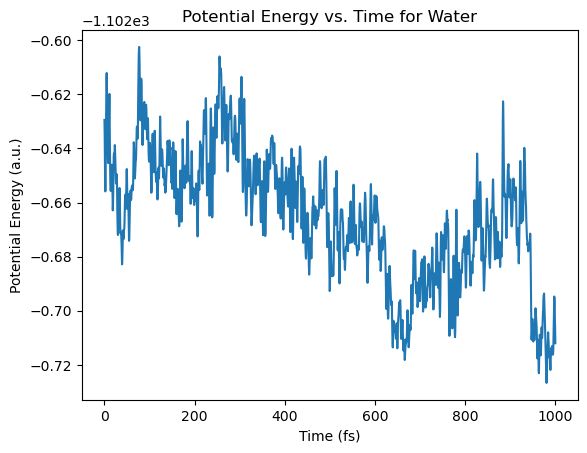

In [7]:
# plot the potential energy of water
plt.plot(water_energy[:,1], water_energy[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time for Water')
plt.savefig('Figures/water_potential_energy.pdf', bbox_inches='tight')
plt.show()

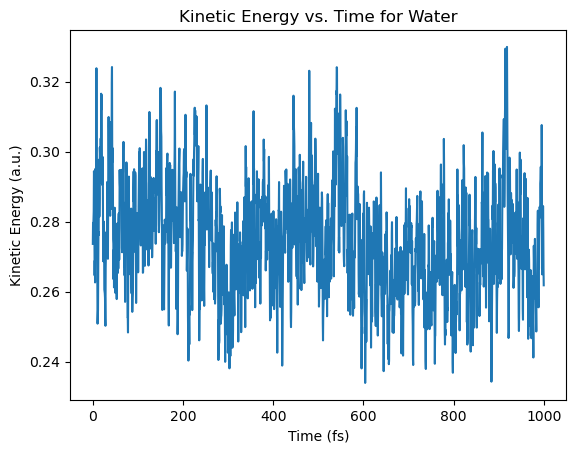

In [9]:
# plot the kinetic energy of water
plt.plot(water_energy[:,1], water_energy[:,2])
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs. Time for Water')
plt.savefig('Figures/water_kinetic_energy.pdf', bbox_inches='tight')
plt.show()

### Energy vs. time for the solvated proton in water

In [10]:
# read the ener file
proton_energy = np.loadtxt('Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener', skiprows=1)

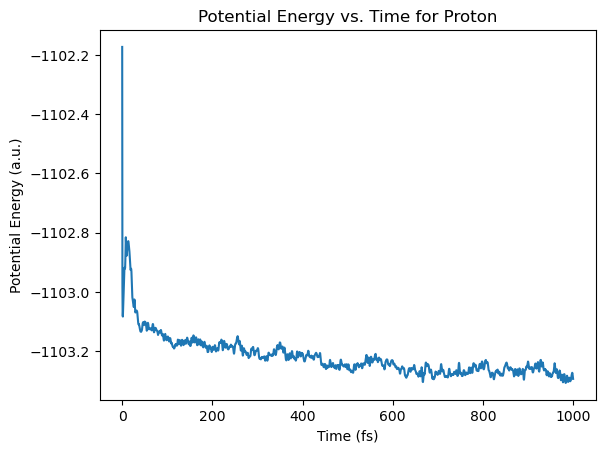

In [11]:
# plot the potential energy of proton
plt.plot(proton_energy[:,1], proton_energy[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time for Proton')
plt.savefig('Figures/proton_potential_energy.pdf', bbox_inches='tight')
plt.show()

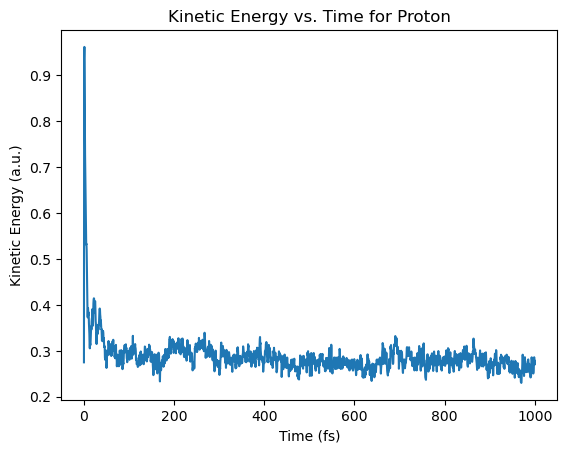

In [12]:
# plot the kinetic energy of proton
plt.plot(proton_energy[:,1], proton_energy[:,2])
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs. Time for Proton')
plt.savefig('Figures/proton_kinetic_energy.pdf', bbox_inches='tight')
plt.show()

### g(r) for Oxygen in water
Note that you have to set the box size. The box size is written in the xyz file and input file, and it is constant for the whole simulation

For the g(r) calculation, the radius need to be less than half the box size to avoid finite size effect.\
The box size for the water system is: `water with unit cell: ABC [angstrom] 12.42 12.42 12.42`

In [15]:
# load the trajectory
water_traj = mda.Universe('Runs/Water/water_aimd_1ps_every0.5fs-pos-1.xyz')

In [29]:
# set dimensions of the box
water_traj.dimensions = np.array([12.42, 12.42, 12.42, 90, 90, 90])

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


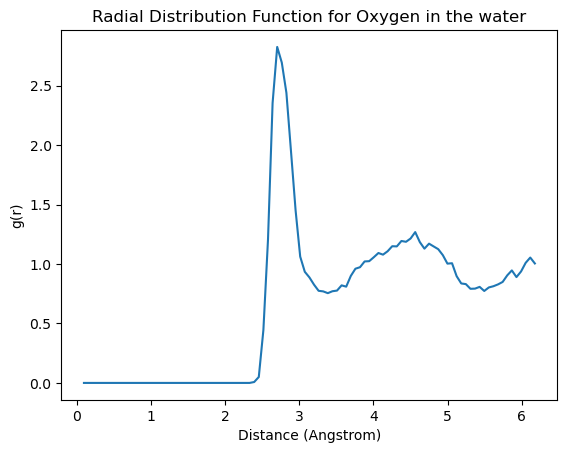

In [38]:
# calculate the radial distribution function for Oxygen
box_size = 12.42
rdf = InterRDF(water_traj.select_atoms('name O'), water_traj.select_atoms('name O'), range=(0.0, box_size / 2), nbins=100)
rdf.run()

# plot the radial distribution function for Oxygen
plt.plot(rdf.bins[1:], rdf.rdf[1:])
# the first one shouldn't be included because it's the RDF of the atom with itself
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for Oxygen in the water')
plt.savefig('Figures/water_O_O_rdf.pdf', bbox_inches='tight')
plt.show()

### g(r) for Oxygen with the solvated proton in water

In [33]:
# load the trajectory
proton_traj = mda.Universe('Runs/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz')
# set dimensions of the box
proton_traj.dimensions = np.array([12.42, 12.42, 12.42, 90, 90, 90])

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


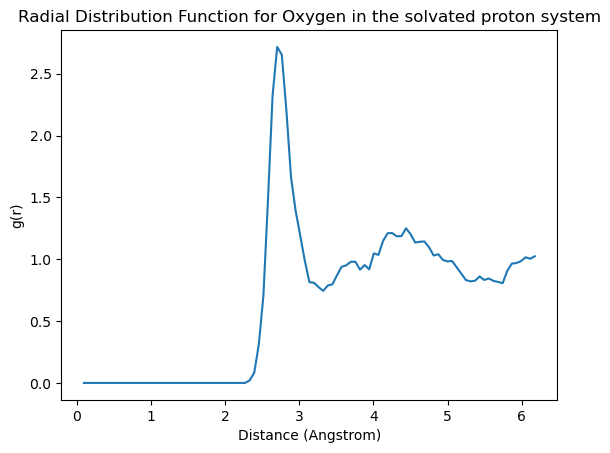

In [39]:
# calculate the radial distribution function for Oxygen
box_size = 12.42
rdf = InterRDF(proton_traj.select_atoms('name O'), proton_traj.select_atoms('name O'), range=(0.0, box_size / 2), nbins=100)
rdf.run()

# plot the radial distribution function for Oxygen
plt.plot(rdf.bins[1:], rdf.rdf[1:])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for Oxygen in the solvated proton system')
plt.savefig('Figures/proton_O_O_rdf.pdf', bbox_inches='tight')
plt.show()